In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Mosaic Migrants Data Challenge /Competition/Dataset/merged_access_immigration_RQ4.csv")

# Step 1: Filter out unwanted zones
df = df[~df["CMANAME"].str.contains("No metropolitan|Strong metropolitan|Weak metropolitan|Moderate metropolitan", case=False, na=False)]

# Step 2: Group by CMANAME and sum relevant columns
grouped = df.groupby("CMANAME")[["W1674", "T1527"]].sum().reset_index()  # T1527 = total population (men + women), Percentage of Women Refugees= (W1674 /  Total Population in that CMANAME )×100

# Step 3: Calculate % of women refugees with 3 decimal places
grouped["% Women Refugees"] = (grouped["W1674"] / grouped["T1527"]) * 100
grouped["% Women Refugees"] = grouped["% Women Refugees"].round(3)

# Step 4: Get top 3 (highest %)
top_percent = grouped.sort_values("% Women Refugees", ascending=False)

# Step 5: Filter out 0s before getting bottom 3 (lowest % but not zero)
nonzero = grouped[grouped["W1674"] > 0]
bottom_percent = nonzero.sort_values("% Women Refugees", ascending=True)

# Step 6: Show results
print("Top 3 CMANAMEs with highest % of women refugees:")
print(top_percent[["CMANAME", "% Women Refugees"]].head(3))

print("\nTop 3 CMANAMEs with lowest (non-zero) % of women refugees:")
print(bottom_percent[["CMANAME", "% Women Refugees"]].head(3))


Top 3 CMANAMEs with highest % of women refugees:
                              CMANAME  % Women Refugees
10                             Brooks             6.589
152                           Windsor             3.117
59   Kitchener - Cambridge - Waterloo             2.765

Top 3 CMANAMEs with lowest (non-zero) % of women refugees:
           CMANAME  % Women Refugees
105       Saguenay             0.019
104  Rouyn-Noranda             0.024
17     Cape Breton             0.031


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Mosaic Migrants Data Challenge /Competition/Dataset/merged_access_immigration_RQ4.csv")

# Step 1: Filter out unwanted metropolitan zones
df = df[~df["CMANAME"].str.contains("No metropolitan|Strong metropolitan|Weak metropolitan|Moderate metropolitan", case=False, na=False)]

# Step 2: Group by CMANAME and sum refugee + population data
grouped = df.groupby("CMANAME")[["W1674", "T1527"]].sum().reset_index()

# Step 3: Calculate % Women Refugees (3 decimal points)
grouped["% Women Refugees"] = (grouped["W1674"] / grouped["T1527"]) * 100
grouped["% Women Refugees"] = grouped["% Women Refugees"].round(3)

# Step 4: Get Top 3 and Bottom 3 CMANAMEs
top_3 = grouped.sort_values("% Women Refugees", ascending=False).head(3)
bottom_3 = grouped[grouped["W1674"] > 0].sort_values("% Women Refugees", ascending=True).head(3)

# Step 5: Define access columns (excluding walk_gs and public_gs)
access_cols = [
    "public_caf", "public_ef", "public_emp", "public_hf", "public_psef", "public_srf",
    "walk_caf", "walk_ef", "walk_emp", "walk_hf", "walk_psef", "walk_srf"
]

# Step 6: Compute average access per CMANAME
access_avg = df.groupby("CMANAME")[access_cols].mean().reset_index()

# Step 7: Merge access scores with top and bottom groups
top_3_access = top_3.merge(access_avg, on="CMANAME", how="left")
bottom_3_access = bottom_3.merge(access_avg, on="CMANAME", how="left")

# Step 8: Display
print("Top 3 CMANAMEs with highest % of women refugees and their average access scores:")
print(top_3_access[["CMANAME", "% Women Refugees"] + access_cols])

print("\nBottom 3 CMANAMEs (non-zero) with lowest % of women refugees and their average access scores:")
print(bottom_3_access[["CMANAME", "% Women Refugees"] + access_cols])


Top 3 CMANAMEs with highest % of women refugees and their average access scores:
                            CMANAME  % Women Refugees  public_caf  public_ef  \
0                            Brooks             6.589    0.000000   0.000000   
1                           Windsor             3.117    0.001001   0.003851   
2  Kitchener - Cambridge - Waterloo             2.765    0.023969   0.077108   

   public_emp  public_hf  public_psef  public_srf  walk_caf   walk_ef  \
0    0.000000   0.000000     0.000000    0.000000  0.002732  0.019608   
1    0.001675   0.001929     0.000498    0.001684  0.003749  0.061271   
2    0.046933   0.030809     0.019374    0.051087  0.007521  0.079352   

   walk_emp   walk_hf  walk_psef  walk_srf  
0  0.016113  0.006599   0.000000  0.024055  
1  0.012752  0.015487   0.002401  0.016911  
2  0.017571  0.019449   0.003936  0.039246  

Bottom 3 CMANAMEs (non-zero) with lowest % of women refugees and their average access scores:
         CMANAME  % Women Refu

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Mosaic Migrants Data Challenge /Competition/Dataset/merged_access_immigration_RQ4.csv")

# Step 1: Filter out unwanted metropolitan zones
df = df[~df["CMANAME"].str.contains("No metropolitan|Strong metropolitan|Weak metropolitan|Moderate metropolitan", case=False, na=False)]

# Step 2: Group by CMANAME and sum refugee + population data
grouped = df.groupby("CMANAME")[["W1674", "T1527"]].sum().reset_index()

# Step 3: Calculate % Women Refugees (3 decimal points)
grouped["% Women Refugees"] = (grouped["W1674"] / grouped["T1527"]) * 100
grouped["% Women Refugees"] = grouped["% Women Refugees"].round(3)

# Step 4: Get Top 3 and Bottom 3 CMANAMEs
top_3 = grouped.sort_values("% Women Refugees", ascending=False).head(3)
bottom_3 = grouped[grouped["W1674"] > 0].sort_values("% Women Refugees", ascending=True).head(3)

# Step 5: Define only the selected access columns
selected_cols = [
    "public_ef", "public_emp", "public_hf",
    "walk_ef", "walk_emp", "walk_hf"
]

# Step 6: Compute average access per CMANAME
access_avg = df.groupby("CMANAME")[selected_cols].mean().reset_index()

# Step 7: Merge access scores with top and bottom groups
top_3_access = top_3.merge(access_avg, on="CMANAME", how="left")
bottom_3_access = bottom_3.merge(access_avg, on="CMANAME", how="left")

# Step 8: Combine the data
combined = pd.concat([top_3_access, bottom_3_access], ignore_index=True)

# Optional: sort or reset index if needed
combined = combined.reset_index(drop=True)

# Step 9: Export to CSV
combined.to_csv("/content/top_bottom_women_refugee_access.csv", index=False)

print("CSV file saved to /content/top_bottom_women_refugee_access.csv")

# Optio


CSV file saved to /content/top_bottom_women_refugee_access.csv


# x-axis represents the sum of average access scores per region across the selected features, shown as percentages
Kitchener - Cambridge - Waterloo (Ontario)
public_ef = 0.08
public_emp = 0.05
public_hf = 0.02
TOTAL BAR LENGTH = 0.08 + 0.05 + 0.02 = 0.15 → shown as 15%


In [ ]:
# Cleanly create CMANAME to PRNAME map
cma_to_pr = df[["CMANAME", "PRNAME"]].drop_duplicates().set_index("CMANAME")["PRNAME"]

# Create Region names safely
top_3_access["Region"] = top_3_access["CMANAME"] + " (" + top_3_access["CMANAME"].map(cma_to_pr) + ")"
bottom_3_access["Region"] = bottom_3_access["CMANAME"] + " (" + bottom_3_access["CMANAME"].map(cma_to_pr) + ")"


# Export to CSV
top_3_access.to_csv("/content/Highestregion_3_women_refugees_access.csv", index=False)
bottom_3_access.to_csv("/content/Lowestregion_3_women_refugees_access.csv", index=False)


print(" CSVs exported successfully.")

 CSVs exported successfully.


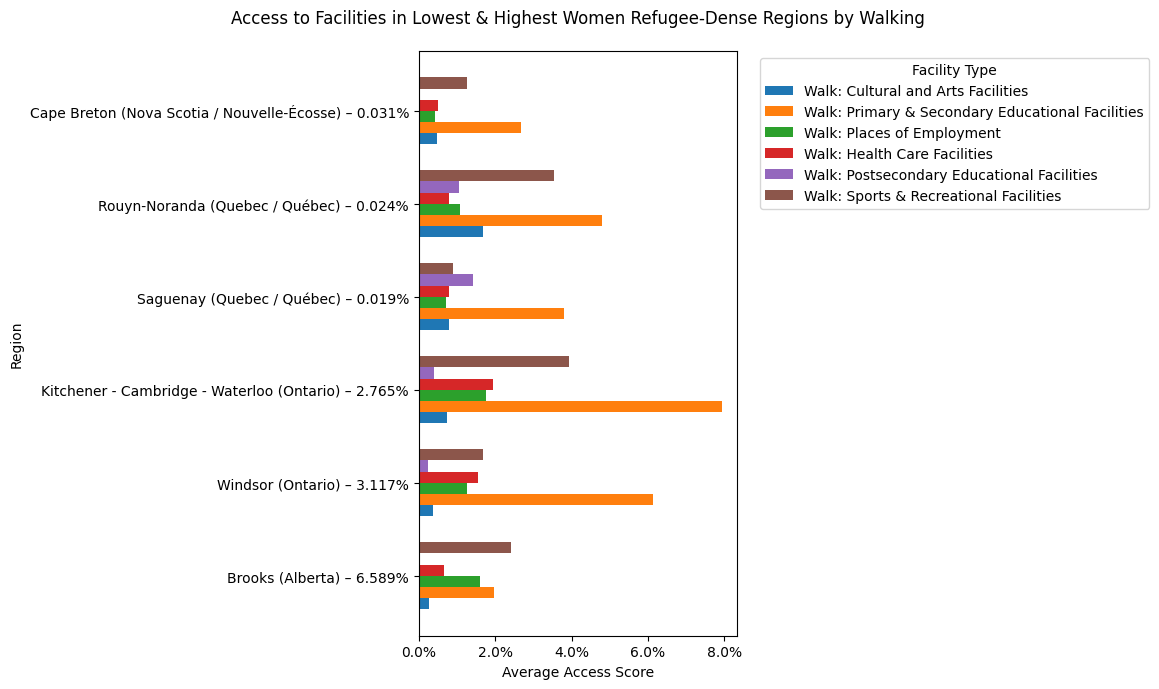

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

# === Load dataset ===
df = pd.read_csv("/content/drive/MyDrive/Mosaic Migrants Data Challenge /Competition/Dataset/merged_access_immigration_RQ4.csv")

# Step 1: Filter out unwanted metropolitan zones
df = df[~df["CMANAME"].str.contains("No metropolitan|Strong metropolitan|Weak metropolitan|Moderate metropolitan", case=False, na=False)]

# Step 2: Group by CMANAME and calculate refugee and total pop
grouped = df.groupby("CMANAME")[["W1674", "T1527"]].sum().reset_index()
grouped["% Women Refugees"] = (grouped["W1674"] / grouped["T1527"]) * 100
grouped["% Women Refugees"] = grouped["% Women Refugees"].round(3)

# Step 3: Get Top 3 and Bottom 3 (non-zero) refugee dense regions
top_3 = grouped.sort_values("% Women Refugees", ascending=False).head(3)
bottom_3 = grouped[grouped["W1674"] > 0].sort_values("% Women Refugees").head(3)

# Step 4: Access columns to include
access_cols = [
    "walk_caf", "walk_ef", "walk_emp", "walk_hf", "walk_psef", "walk_srf"
]

# Step 5: Compute average access scores
access_avg = df.groupby("CMANAME")[access_cols].mean().reset_index()

# Step 6: Merge access scores into top and bottom
top_3_access = top_3.merge(access_avg, on="CMANAME", how="left")
bottom_3_access = bottom_3.merge(access_avg, on="CMANAME", how="left")

# Step 7: Combine and format for plotting
plot_df = pd.concat([top_3_access, bottom_3_access], ignore_index=True)
plot_df = plot_df.merge(df[["CMANAME", "PRNAME"]].drop_duplicates(), on="CMANAME", how="left")

# Create Region + Refugee % label for y-axis
plot_df["Region"] = (
    plot_df["CMANAME"] + " (" + plot_df["PRNAME"] + ") – " +
    plot_df["% Women Refugees"].round(3).astype(str) + "%"
)
plot_df["Group"] = ["High Region"] * 3 + ["Low Region"] * 3

# Legend mapping for full descriptive labels
legend_labels = {
    "walk_caf": "Walk: Cultural and Arts Facilities",
    "walk_ef": "Walk: Primary & Secondary Educational Facilities",
    "walk_emp": "Walk: Places of Employment",
    "walk_hf": "Walk: Health Care Facilities",
    "walk_psef": "Walk: Postsecondary Educational Facilities",
    "walk_srf": "Walk: Sports & Recreational Facilities"
}

# === Plotting ===
plot_features = access_cols
y = np.arange(len(plot_df))
bar_height = 0.12

fig, ax = plt.subplots(figsize=(12, 7))

# Plot with bar grouping offset
for i, feature in enumerate(plot_features):
    ax.barh(
        y + (i - 2.5) * bar_height,
        plot_df[feature],
        height=bar_height,
        label=legend_labels.get(feature, feature)
    )

# Axis labels and ticks
ax.set_title("Access to Facilities in Lowest & Highest Women Refugee-Dense Regions by Walking", pad=20)
ax.set_xlabel("Average Access Score")
ax.set_ylabel("Region")
ax.set_yticks(y)
ax.set_yticklabels(plot_df["Region"])
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Legend and layout
ax.legend(title="Facility Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Access to Facilities in Lowest & Highest Women Refugee-Dense Regions by Walking.png")
plt.show()


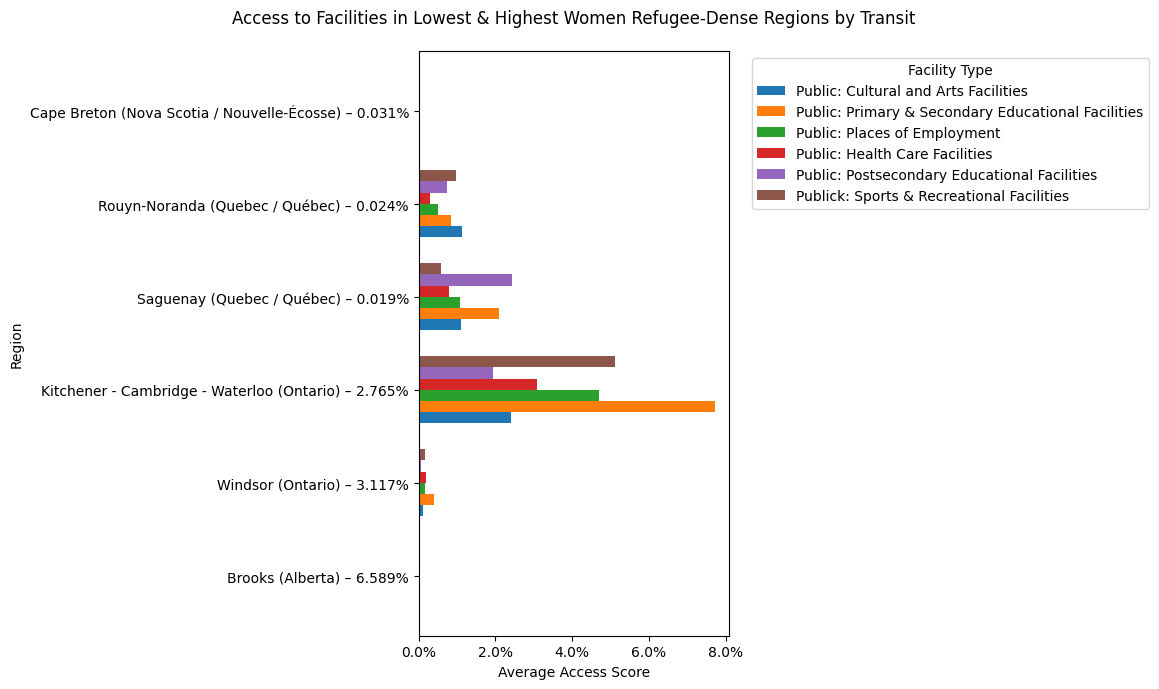

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

# === Load dataset ===
df = pd.read_csv("/content/drive/MyDrive/Mosaic Migrants Data Challenge /Competition/Dataset/merged_access_immigration_RQ4.csv")

# Step 1: Filter out unwanted metropolitan zones
df = df[~df["CMANAME"].str.contains("No metropolitan|Strong metropolitan|Weak metropolitan|Moderate metropolitan", case=False, na=False)]

# Step 2: Group by CMANAME and calculate refugee and total pop
grouped = df.groupby("CMANAME")[["W1674", "T1527"]].sum().reset_index()
grouped["% Women Refugees"] = (grouped["W1674"] / grouped["T1527"]) * 100
grouped["% Women Refugees"] = grouped["% Women Refugees"].round(3)

# Step 3: Get Top 3 and Bottom 3 (non-zero) refugee dense regions
top_3 = grouped.sort_values("% Women Refugees", ascending=False).head(3)
bottom_3 = grouped[grouped["W1674"] > 0].sort_values("% Women Refugees").head(3)

# Step 4: Access columns to include (Public Transit only)
access_cols = [
    "public_caf", "public_ef", "public_emp", "public_hf", "public_psef", "public_srf"
]

# Step 5: Compute average access scores
access_avg = df.groupby("CMANAME")[access_cols].mean().reset_index()

# Step 6: Merge access scores into top and bottom
top_3_access = top_3.merge(access_avg, on="CMANAME", how="left")
bottom_3_access = bottom_3.merge(access_avg, on="CMANAME", how="left")

# Step 7: Combine and format for plotting
plot_df = pd.concat([top_3_access, bottom_3_access], ignore_index=True)
plot_df = plot_df.merge(df[["CMANAME", "PRNAME"]].drop_duplicates(), on="CMANAME", how="left")

# Create Region + Refugee % label for y-axis
plot_df["Region"] = (
    plot_df["CMANAME"] + " (" + plot_df["PRNAME"] + ") – " +
    plot_df["% Women Refugees"].round(3).astype(str) + "%"
)
plot_df["Group"] = ["High Region"] * 3 + ["Low Region"] * 3

# Legend mapping for full descriptive labels
legend_labels = {
    "public_caf": "Public: Cultural and Arts Facilities",
    "public_ef": "Public: Primary & Secondary Educational Facilities",
    "public_emp": "Public: Places of Employment",
    "public_hf": "Public: Health Care Facilities",
    "public_psef": "Public: Postsecondary Educational Facilities",
    "public_srf": "Publick: Sports & Recreational Facilities"
}

# === Plotting ===
plot_features = access_cols
y = np.arange(len(plot_df))
bar_height = 0.12

fig, ax = plt.subplots(figsize=(12, 7))

# Plot with bar grouping offset
for i, feature in enumerate(plot_features):
    ax.barh(
        y + (i - 2.5) * bar_height,
        plot_df[feature],
        height=bar_height,
        label=legend_labels.get(feature, feature)
    )

# Axis labels and ticks
ax.set_title("Access to Facilities in Lowest & Highest Women Refugee-Dense Regions by Transit", pad=20)
ax.set_xlabel("Average Access Score")
ax.set_ylabel("Region")
ax.set_yticks(y)
ax.set_yticklabels(plot_df["Region"])
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Legend and layout
ax.legend(title="Facility Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Access to Facilities in Lowest & Highest Women Refugee-Dense Regions by Transit.png")
plt.show()
